In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [9]:

df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [10]:
# The total_days represents the total amount of time
# each student has spent in classroom.
# get the average classroom time for control group
control_mean = df[df['group'] == 'control']['total_days'].mean()

# get the average classroom time for experiment group
experiment_mean = df[df['group'] == 'experiment']['total_days'].mean()

# display average classroom time for each group
control_mean, experiment_mean

(73.368990384615387, 74.671593533487297)

In [11]:
# compute observed difference in classroom time
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

1.3026031488719099

In [12]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
for _ in range(10000):
    samp = df.sample(df.shape[0], replace = True)
    cont = samp[samp['group'] == 'control']['total_days'].mean()
    exp = samp[samp['group'] == 'experiment']['total_days'].mean()
    diffs.append(cont - exp)

In [13]:
# convert to numpy array
diffs = np.array(diffs)

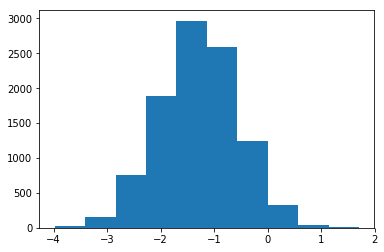

In [14]:
# plot sampling distribution
plt.hist(diffs);

In [15]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diff.shape[0])

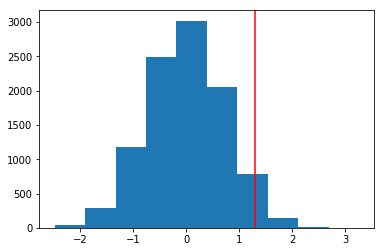

In [16]:
# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(x=obs_diff, color = 'red'); 

In [17]:
# compute p value
(null_vals > obs_diff).mean()

0.038399999999999997